# Tasks 

In [4]:
import numpy as np 
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.oneway import effectsize_oneway

# Setting a random seed so the same samples can be randommy calculated from the same starting position
np.random.seed(42)

## Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

### Selecting the correct six cups of tea in a row

In [5]:
total_cups_tea = 12
milk_first = 6
tea_first = 6

x = math.comb(12, 6)
print(x)

924


### Selecting the correct six cups of tea in a row

In [6]:
1+1

2

In the first question there are 924 total combinations to select 6 from 12 not counting if milk first or tea first (*n! / (k! * (n - k)!)* where  *n12! / (6! * (12 - 6)!)* = 924) using the formula from [*math.comb*](https://docs.python.org/3/library/math.html#math.comb). 

## Task 2: numpy's Normal Distribution

In this task you will assess whether *numpy.random.normal()* properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the *scipy.stats.shapiro()* function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [7]:
normal = np.random.normal(loc=10, scale=3, size=100000)

print(normal.mean(),normal.std())

10.00290060442285 3.002702862884671


In [8]:
normal_test = stats.shapiro(normal)
print(normal_test.statistic, normal_test.pvalue)

0.9999908845449028 0.9998300806280184


c:\Users\Ellen\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100000.
  res = hypotest_fun_out(*samples, **kwds)


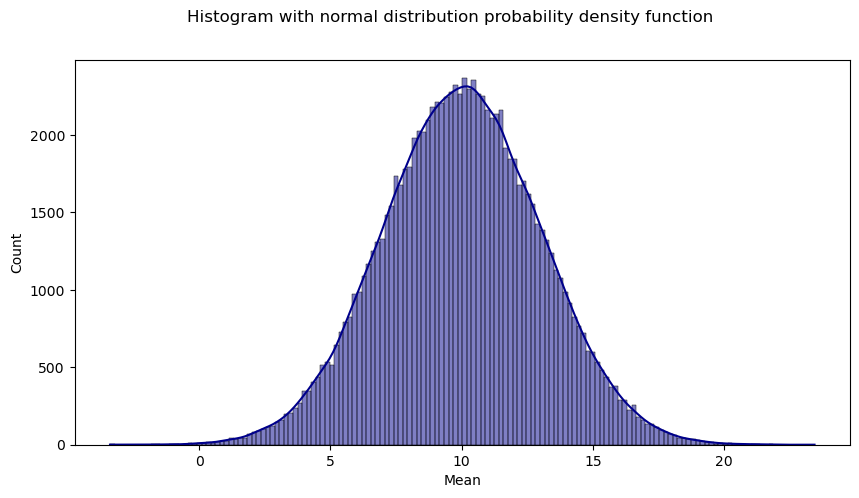

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Histogram with normal distribution probability density function')
sns.histplot(normal, kde=True, color = 'darkblue')
ax.set_xlabel('Mean')
plt.show();

With a test statistic close to 1, it is likely arising from a normal [distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html).

## Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program. Calculate the t-statistic based on this data set, using Python. Compare it to the value given by *scipy.stats*.

**Table 1:** Data for test
|Patient ID	   |0	|1	|2	|3	|4	|5	|6	|7	|8	|9| 
|:-------------|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Before        |63	 |68   |70   |	64 |74	 |67   |70	 |57   |66	 | 65  |
|After	       |64	 |64   |68   |	64 |73   |	70 |72   |	54 |61   |	63 |


**Note:** The above table was created in markdown using a [Codecademy](https://www.codecademy.com/resources/docs/markdown/tables) webpage as guidance. Too keep the numbers centre aligned the *:---:* was used inbetween the vertical lines (*|*). 

In [10]:
# Initialize data to dataframe
data = {'Patient_ID': [0,1,2,3,4,5,6,7,8,9],
        'Before': [63, 64, 70, 64, 74, 67, 70, 57, 66, 65],
        'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]}
patient_data = pd.DataFrame(data)
print(patient_data.head(2))

   Patient_ID  Before  After
0           0      63     64
1           1      64     64


### T-test using python

As this data is paired, a paired t-test (or dependent t-test) can be used to compare. This test is useful for before-and-after measurements for a group of people such as in this example ([JMP](https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html)). 

The assumptions of the paired t-test are;
- Patients must be independent. 
- Each of the paired measurements must be obtained from the same patient.
- The measured differences are normally distributed.

Whilst the first two assumptions are two, the below Q-Q plots show that both sets of before and after are normally distributed. 

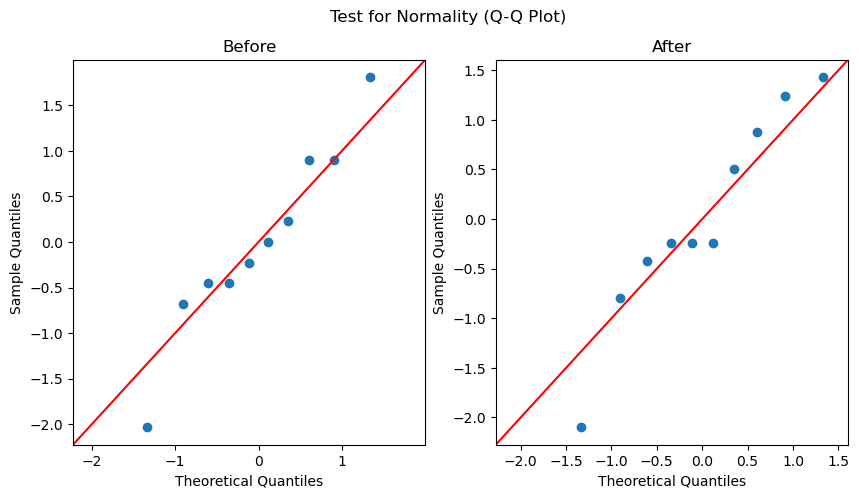

In [11]:
# test for normality assumption 
# Subplotting for matplotlib plots is straightforward, but subplotting with statsmodels plots such as the Q-Q plot can be trickier. 
# The below website address this with subplotting with seaborn as an example, but was modified to work with the qqplot function in 
# statsmodels. 
# Resource; https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Test for Normality (Q-Q Plot)')
sm.qqplot(patient_data['Before'],line='45', fit=True, ax=ax[0])
ax[0].set_title('Before')
sm.qqplot(patient_data['After'],line='45', fit=True, ax=ax[1])
ax[1].set_title('After')
plt.show();

In [12]:
# While the data is mostly on the line, a check of the mean and median (50%) below shows that for both they are similar and as such are 
# approximately noramlly distributed and as all t-test assumptions are made, we can carry out t-test. 

print(patient_data.describe())

       Patient_ID     Before      After
count    10.00000  10.000000  10.000000
mean      4.50000  66.000000  65.300000
std       3.02765   4.666667   5.677441
min       0.00000  57.000000  54.000000
25%       2.25000  64.000000  63.250000
50%       4.50000  65.500000  64.000000
75%       6.75000  69.250000  69.500000
max       9.00000  74.000000  73.000000


To test in python a function can be written with data as input with the associated alpha (normally 5%). While there is an example of how to do this [here](https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) it needs to be altered 

In [13]:
def paired_ttest(data1, data2, alpha=0.05):
    '''
    Takes two columns (data1, data2) and alpha and computes the paired t-test 
    whilst returning the t-test statisti, degrees of freedom, critica value, 
    and p-value. 

    parameters:
        data1 (DataFrame): column1 of dataframe
        data1 (DataFrame): column1 of dataframe
        alpha (int): significane level (default value of 0.05)

    Returns:
        t_stat: t-test test statistic
        df: degrees of freedom
        cv: critical value
        p: p-value



    Written using: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

'''
    mean1, mean2 = np.mean(data1), np.mean(data2)
    n = len(data1)
    d1 = np.sum([(data1[i]-data2[i])**2 for i in range(n)])
    d2 = np.sum([data1[i]-data2[i] for i in range(n)])
    sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
    sed = sd / np.sqrt(n)
    t_stat = (mean1 - mean2) / sed
    df = n - 1
    cv = stats.t.ppf(1.0 - alpha, df)
    p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0 # *2 as two-sided test
    return t_stat, df, cv, p
    # print(f"The t-test test statistic is {t_stat}, while the critical value is\
    #           {cv} with {df} degrees of freedom with a p-value of {p}")

In [14]:
t_stat, df, cv, p = paired_ttest(patient_data['Before'], patient_data['After'])
print(f"T-test Statistic = {t_stat:.3f} \nDegrees of freedom = {df} \nCritical Value = {cv:.3f} \np-value = {p:.4f}")


T-test Statistic = 0.920 
Degrees of freedom = 9 
Critical Value = 1.833 
p-value = 0.3816


### T-test using Scipy.Stats

In [15]:
# stats.ttest_rel is the paired t-test available from scipi and used for comparison . 
t_test = stats.ttest_rel(patient_data['Before'],patient_data['After'],alternative='two-sided')
print(t_test)

TtestResult(statistic=0.9200267041104794, pvalue=0.3815568006229638, df=9)


### Conclusion

**Table 2:** Comparision of results
|Method	   |t statistic	|p-value	|df	|
|:-------------|:---:|:---:|:---:|
|Python        |0.920	 |0.3816   |9   |
|*stats.ttest_rel*	       |0.920	 |0.3816   |9   |

Table 2 shows that both the python approach and *stats.ttest_rel* results the same results (the *alternative* parameter was selected as two-sided as the question required to assess for a difference not if heart rates decreased or increased after the exercise program which would result in a one-sided test). 

The null hypothesis (H<sub>0</sub>) is that the population mean of the differences is zero whilst the alternative hypothesis (H<sub>1</sub>) is that the population mean of the differences does not equal which is written as*;\
**Null Hypothesis**: H<sub>0</sub>: μd = 0\
**Alternative Hypothesis**: H<sub>1</sub>: μd ≠ 0

As the p-value > 0.05 this means that the null hypothesis (H<sub>0</sub>) cannot be rejected and one must conclude that there is no evidence in the data to suggest that the two-week exercise program lowers heart-rate. 

*Link to [site](https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html)

## Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

1. Use *numpy.random.normal* to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

2. Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

In [16]:
# https://sciences.usca.edu/biology/zelmer/305/anova/
# https://study.com/skill/learn/calculating-probability-of-a-type-ii-error-for-a-specific-significance-test-when-given-the-power-explanation.html#:~:text=Step%201%3A%20Identify%20the%20given,about%20the%20Type%20II%20Error.
# https://fastercapital.com/content/Type-II-error--Avoiding-Missed-Discoveries-in-Two-Way-ANOVA.html#:~:text=Interactions%20in%20Two%2DWay%20ANOVA,and%20conduct%20post%2Dhoc%20tests.
# https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_power/bs704_power_print.html

In [17]:
# no_type_ii = 0

# for i in range(10000):
#     normal1 = np.random.normal(loc=4.9, scale=0.1, size=100)
#     normal2 = np.random.normal(loc=5.0, scale=0.1, size=100)
#     normal3 = np.random.normal(loc=5.1, scale=0.1, size=100)
#     group_means = (np.mean(normal1), np.mean(normal2), np.mean(normal3))
#     group_stds = (np.std(normal1), np.std(normal2), np.std(normal3))
#     anova = f_oneway(normal1, normal2, normal3)
#     n_groups, nobs, alpha = 3, 300, 0.05
#     effect_size = effectsize_oneway(group_means, group_stds, nobs=nobs)
#     power_analysis = FTestAnovaPower()
#     power = power_analysis.solve_power(effect_size=effect_size, k_groups=n_groups, nobs=nobs, alpha=alpha)
#     prob_type_ii_error = 1 - power # probability of beta ris
#     if prob_type_ii_error > 0.94:
#         no_type_ii += 1
    

In [18]:
def func(mean1, mean2, mean3, std1, std2, std3, n1, n2, n3):
    no_type_ii = 0
    for i in range(10000):
        normal1 = np.random.normal(loc=mean1, scale=std1, size=n1)
        normal2 = np.random.normal(loc=mean2, scale=std2, size=n2)
        normal3 = np.random.normal(loc=mean3, scale=std3, size=n3)
    group_means = (np.mean(normal1), np.mean(normal2), np.mean(normal3))
    group_stds = (np.std(normal1), np.std(normal2), np.std(normal3))
    anova = f_oneway(normal1, normal2, normal3)
    n_groups, nobs, alpha = 3, (n1 + n2 + n3), 0.05
    effect_size = effectsize_oneway(group_means, group_stds, nobs=nobs)
    power_analysis = FTestAnovaPower()
    power = power_analysis.solve_power(effect_size=effect_size, k_groups=n_groups, nobs=nobs, alpha=alpha)
    prob_type_ii_error = 1 - power # probability of beta ris
    if prob_type_ii_error > 0.5:
        no_type_ii += 1
    return print(f"There were {no_type_ii} instances of Type II errors out of 10000 ANOVA tests or {(no_type_ii/10000)*100}%")

In [19]:
print(func(4.9, 5.0, 5.1, 0.1, 0.1, 0.1, 100, 100, 100))

There were 1 instances of Type II errors out of 10000 ANOVA tests or 0.01%
None
